# Import dependecies

In [132]:
# Import necessary system-related functionalities
import sys
import warnings
import subprocess

try:
  import pandas as pd
  import numpy as np
  from sklearn.datasets import load_iris
  from sklearn.model_selection import train_test_split
  import random
  from sklearn.tree import export_text
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.tree import plot_tree
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import accuracy_score
  print("✅ Libraries imported successuflly!")

except ImportError as e:
  missing_module = str(e).split("No module named ")[1].strip("'")
  print(f"❌ ImportError: {e} - Attempting to automatically install missing library: {missing_module} ")
  subprocess.check_call([sys.excutable, "-m", "pip", "install", missing_module])
  print(f"✅ {missing_module} has been installed. Please restart your runtime and rerun the code.")

except Exception as e:
  print(f"❌An unexpected error occurred {e}")

✅ Libraries imported successuflly!


# Load and descover data

In [2]:
# Load datasets from sklearn.datasets
try:
  data = load_iris()
  print(f"✅ Dataset loaded successfully!")

except Exception as e:
  print(f"❌ Error loading dataset: {e}")



✅ Dataset loaded successfully!


In [3]:
# transform data & check for missing values
try:
  df = pd.DataFrame(data.data, columns= data.feature_names) # Convert data to pandas dataFrame

  # Add Target column
  df['target']  = data.target
  print("✅ Dataset sucessuflly converted to pandas DataFrame!")

  # display data informations
  print("_"* 54)
  print("\nDatser information:")
  print(df.info())

  print("_" * 54)
  missing_values = df.isnull().values.any()
  print(f"\nMissing values check")
  print(f"⚠️ df contain missing values" if missing_values else"✅ df is clean, it dosn't contain any missing values")

  print("_" * 80)

except Exception as e:
  print(f"❌ Error converting dataset to DataFrame: {e}")





✅ Dataset sucessuflly converted to pandas DataFrame!
______________________________________________________

Datser information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
______________________________________________________

Missing values check
✅ df is clean, it dosn't contain any missing values
________________________________________________________________________________


In [4]:
# Display the dataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# change the data columns name
df.rename(columns= {
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'

}, inplace = True)

In [6]:
# Create data copy for backup
df_bakcup = df.copy()

# EDA Data Analysis

## Feature distribution check `Histograms`

In [7]:
def plot_feature_distribution(df,col):
  """
  Plots a histogram with KDE for a specific feature with a random modern color.

  Args:
  df (DataFrame): The dataset.
  col (str): The name of the column to plot.

  Returns:
  None
  """
  try:
    sns.set_style("whitegrid") # Set seaborn style

    # Chose a random color from seaborn's color palette
    colors = sns.color_palette("husl", 10)
    color_choice = random.choice(colors)

    plt.figure(figsize = (10, 7))
    sns.histplot(df[col], kde = True, bins = 20, edgecolor = 'black', color = color_choice)

    # Add labels
    plt.title(f"Distribution of {col}", fontsize = 15, fontweight = "bold")
    plt.xlabel(col)
    plt.ylabel("Frequency")


    plt.show();
  except Exception as e:
    print(f"❌ An unexpected error occurred: {e} ")

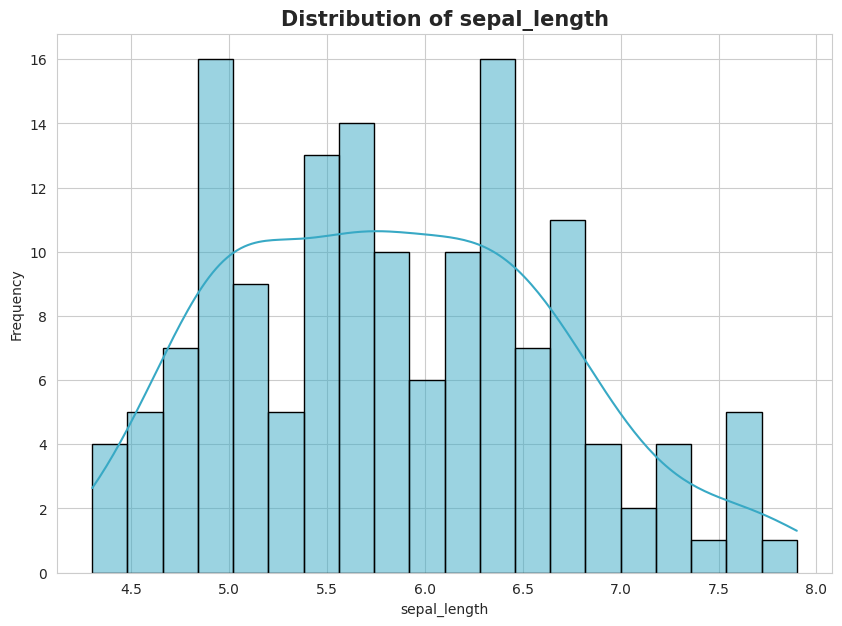

In [8]:
# distribution of `sepal_length`
plot_feature_distribution(df, 'sepal_length')

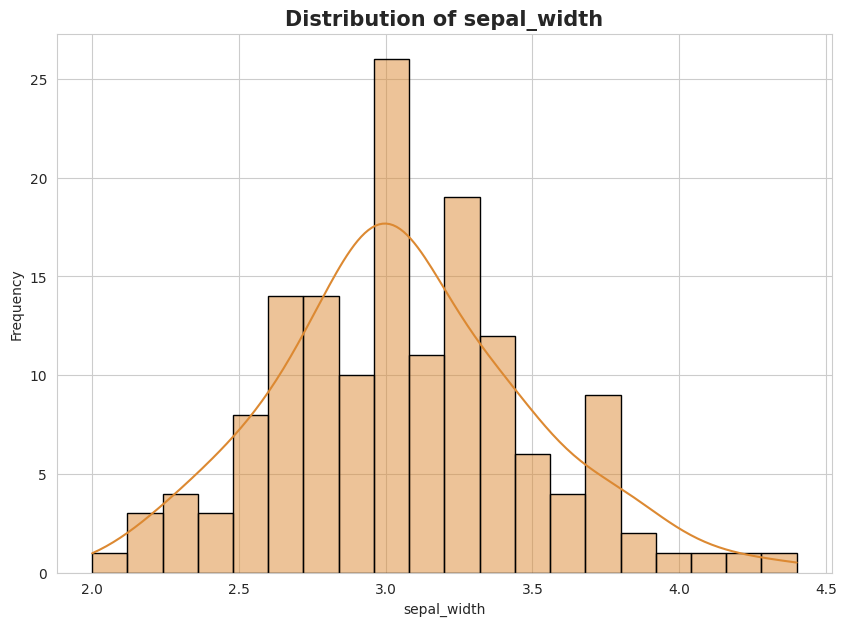

In [9]:
# distribution of `sepal_length`
plot_feature_distribution(df, 'sepal_width')

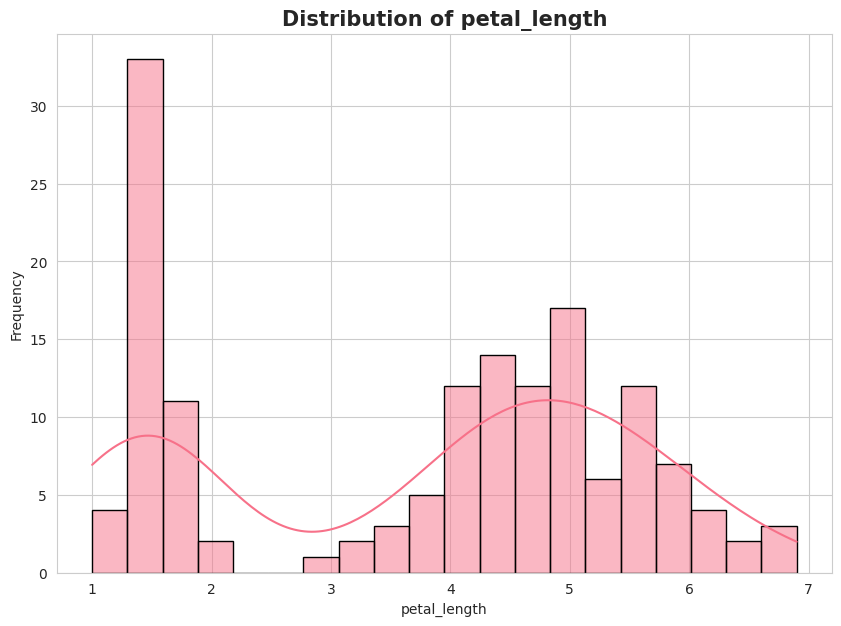

In [10]:
# distribution of `sepal_length`
plot_feature_distribution(df, 'petal_length')

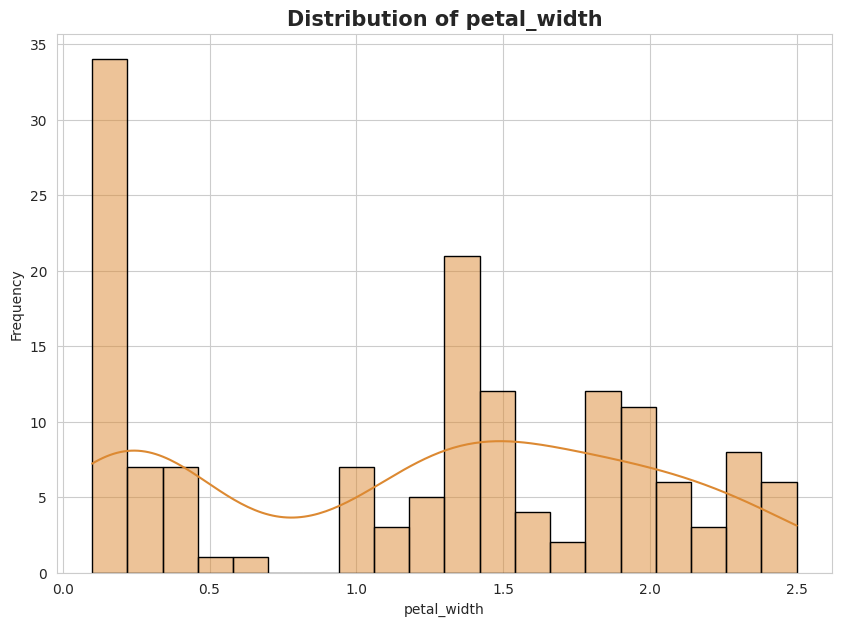

In [11]:
# distribution of `sepal_length`
plot_feature_distribution(df, 'petal_width')

**🔍 Interpretation of Feature Distributions**

Based on The histogram + KDE plots, here’s what i observe:


* ✅ Sepal Width → Looks normally distributed (unimodal, bell-shaped).
* ✅ Sepal Length, Petal Length, Petal Width → Show multiple peaks (multimodal distributions).
___

**🚀 What This Means for Decision Trees?**

  * ✔ Decision Trees are not affected by distribution shapes → Unlike linear models, they don’t assume normality.
  * ✔ Multimodal features suggest natural clusters, which could align with different flower species.
  * ✔ Feature importance will later confirm if all these features are useful.

## Class distribution Visualization

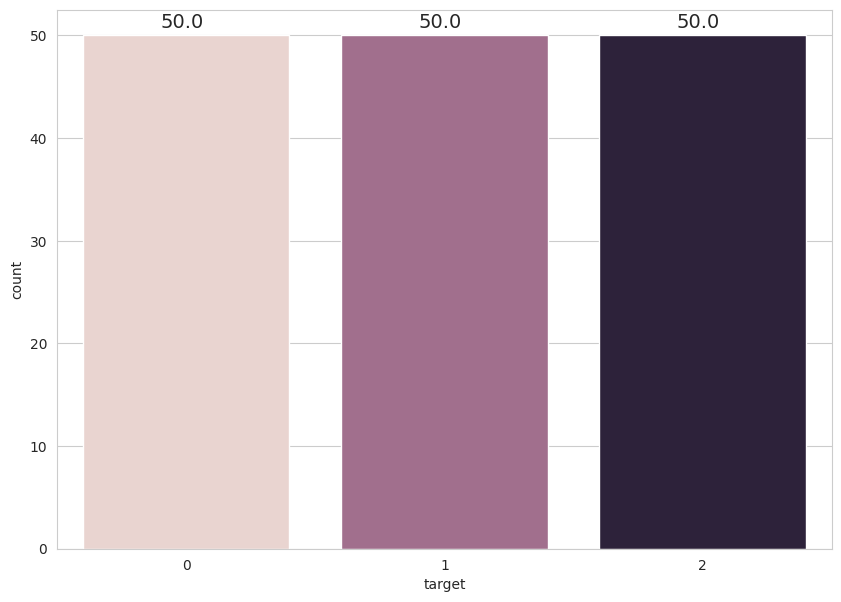

In [12]:
# Set the background style
sns.set_style("whitegrid")

plt.figure(figsize = (10, 7))
# Set the background style
sns.set_style("whitegrid")

# Creat a count plot, plot the number of occurences for each class
ax = sns.countplot(x='target', data=df, hue='target', legend = False)

# Annonates bar with thier count vlaues
for p in ax.patches:
  ax.annotate(f"{p.get_height()}", (p.get_x() + 0.3, p.get_height() + 0.7), fontsize = 14)



    ✔ Each class (0, 1, 2) has exactly 50 samples → Perfectly balanced dataset.
    ✔ No need for oversampling or undersampling.
    ✔ We can proceed directly to model training without worrying about class imbalance.



## Feature relationships (Pairplots & Correlation Heatmap)

### Pairplots for feature Relationships

<Figure size 1000x700 with 0 Axes>

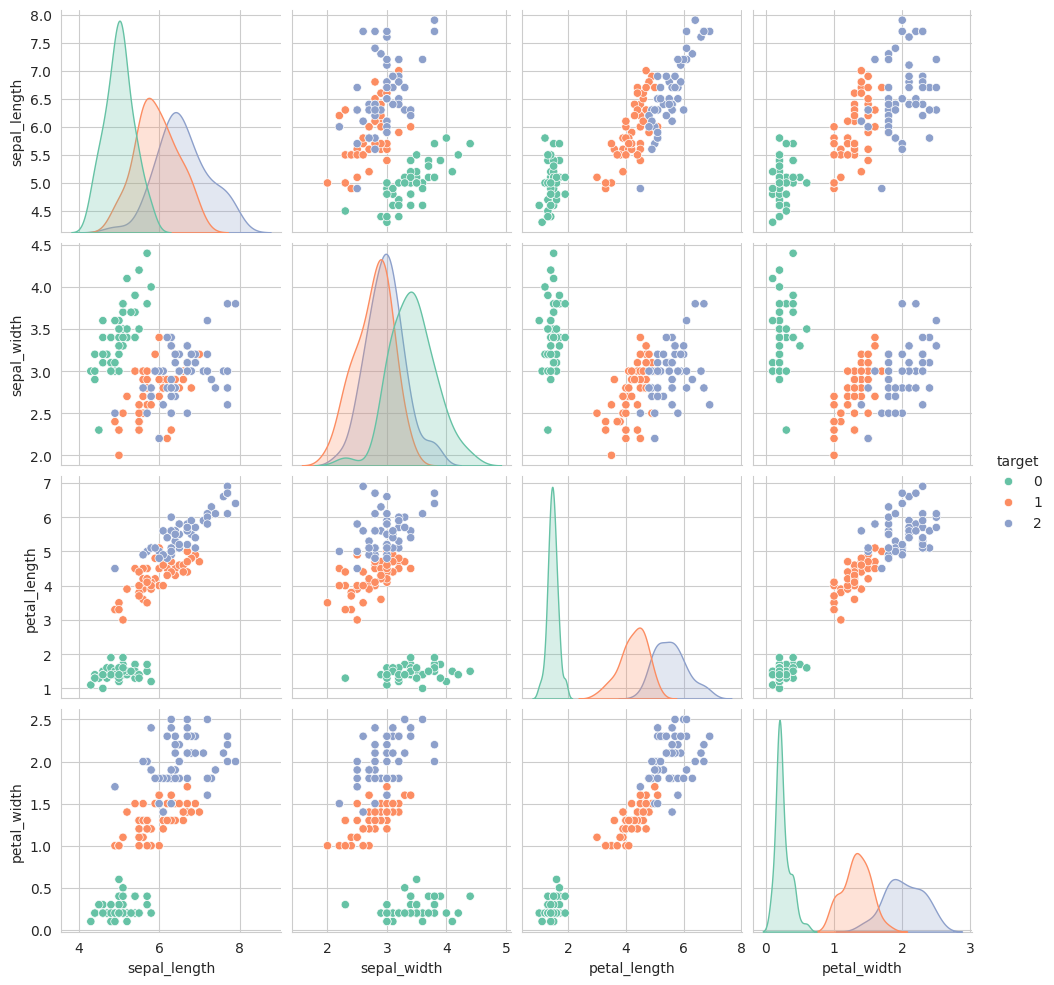

In [13]:
sns.set_style("whitegrid")

plt.figure(figsize = (10, 7))
sns.pairplot(df, hue = 'target', palette = 'Set2', diag_kind = 'kde')
plt.show();

**✅ Interpretation of Pairplot (Feature Relationships)**

* 1️⃣ Clear seperation for class 0 (green) -> especialy in `petal_length` & `petal_width`.
* 2️⃣ Some overlap between class 1 (orange) & class 2 (blue) -> Thise classas are hrarder to separate.
* 3️⃣ Strong linear relationships -> Features like `petal_length` & `petal_width show a strong correlation.
___


**🚀 What This Means for Decision Trees?**
* ✅ Good separability for Class 0 → Decision Trees should easily classify it.
* ✅ Class 1 & 2 might need more depth → Since they overlap, the model might need deeper splits.
* ✅ Feature importance later will confirm which features are most useful.

### Correlation Heatmap (Feature Redundancy check)

In thise step, we will:

* ✔ Check correlations between features → Identify redundancy.
* ✔ Find highly correlated pairs → If two features are strongly correlated, one might be removed to simplify the model.

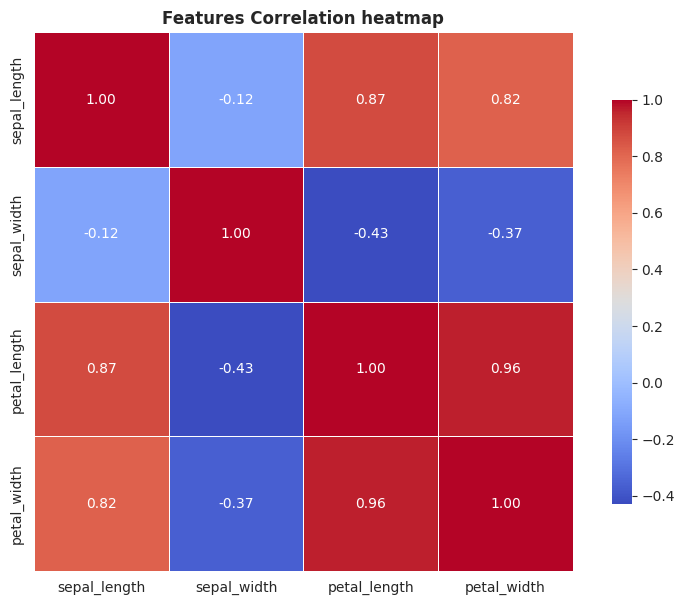

In [20]:
# Compute correlation matrix
corr_matrix = df.drop(columns = 'target').corr()

# plot heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Title
plt.title("Features Correlation heatmap", fontsize = 12, fontweight="bold")
plt.show();

**✅ Interpretation of Correlation Heatmap**

  - ✔ `Petal Length` & `Petal Width` are highly correlated (``0.96``) → They provide almost the same information.
  * ✔ `Sepal Length` is also strongly correlated with `Petal Length` (``0.87``) and Petal Width (0.82) → Some redundancy.
  * ✔ `Sepal Width` has weak correlations with other features (``< 0.5``) → Likely an independent feature.

**🚀 What This Means for Decision Trees?**

  * ✔ Decision Trees handle correlated features well → No need to remove them now.
  * ✔ Feature importance analysis later will confirm if we should drop any redundant features.
  * ✔ If needed, dimensionality reduction (`PCA`) could also simplify the dataset.

## Statistic descriptive  

In [22]:
def descriptive_statistics(df):
  """
  Computes descriptive statistics for numerical columns in a dataset.

  Args:
  df (DataFrame): The dataset.

  Returns:
  DataFrame: A summary of statistics including mean, median, std, min, max, skewness, and kurtosis.
  """

  numeric_df = df.select_dtypes(include = ['float64', 'int64'])

  # Compute statistics
  stats = numeric_df.describe().T
  stats["skewness"] = numeric_df.skew()
  stats["kurtosis"] = numeric_df.kurtosis()

  return stats

In [24]:
stats = descriptive_statistics(df)
stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0.314911,-0.552064
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,0.318966,0.228249
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,-0.274884,-1.402103
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,-0.102967,-1.340604
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0,0.000000,-1.510135


from matplotlib import pyplot as plt
stats['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
stats.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stats.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stats.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stats.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stats.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
stats['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stats['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stats['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
stats['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

# Preprocessing

In [25]:
# Prepare X & y
X = df.drop(columns = ['target'])
y = df['target']
print("✅ Feature and target separated successfuly!")

✅ Feature and target separated successfuly!


In [30]:
# split data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) # `stratify` Ensures class distribution stays balanced.
print(f"✅ The data has been splited successfuly!")

print("*" * 55)
print(f"the size of train splits:\n X_train.shape: {X_train.shape}\n y_train.shape: {y_train.shape}")
print(f"\nthe size of test splits:\n X_test.shape: {X_test.shape}\n y_test.shape: {y_test.shape}")



✅ The data has been splited successfuly!
*******************************************************
the size of train splits:
 X_train.shape: (120, 4)
 y_train.shape: (120,)

the size of test splits:
 X_test.shape: (30, 4)
 y_test.shape: (30,)


# Implementing Gini Index & Entropy


## **Step 1:** Implement  `Gini` Index calculation by hand.

Now, we will:
* ✅ Calculate the Gini Index for the entire dataset.
* ✅ Compute Gini Index after splitting on a specific feature.
* ✅ Understand how decision trees select the best splits.
___

### 📌 What Is the Gini Index?

The Gini Index measures impurity in a dataset.

   -   $Gini = 1 - \sum p_i^2$

Where:

- \( p_i \) is the proportion of class \( i \) in a dataset.
- If \( Gini = 0 \), the dataset is pure (all samples belong to one class).
- If \( Gini \) is high, the dataset is more impure.


In [35]:
# Compute the gini index for the entire dataset
def gini_index(y):
  """
  Computes the Gini Index for a given set of class labels.

  Args:
  y (list or array): The target class labels.

  Returns:
  float: Gini Index value.
  """

  # Count occurances of each class
  _, counts = np.unique(y, return_counts = True)

  # Claculate probabilities
  probabilities = counts / counts.sum()

  # Compute gini-index
  gini = 1 - np.sum(probabilities ** 2  )
  return gini

In [37]:
gini_dataset = gini_index(y)
print(f"✅ Gini Index for the entire dataset: {gini_dataset:.4f}")


✅ Gini Index for the entire dataset: 0.6667


The dataset is very mixed.


In [83]:
# Compute the gini index for individual splits
def gini_continuous(features, target):
  """
    Computes the weighted Gini Index for a dataset split by a feature.

    Args:
    feature (array): The feature used to split.
    target (array): The target variable (class labels).

    Returns:
    float: Weighted Gini Index for the split.
  """
  try:
    sorted_indices = np.argsort(features) # sort features
    sorted_features = features[sorted_indices]
    sorted_target = target[sorted_indices]

    # Start with worst gini
    best_gini = 1
    best_threshold = None

    # Try splitting at every midpoint between consecutive values
    for i in range(1, len(feature)):
      threshold = (sorted_features[i-1] + sorted_features[i])/2 # midpoint as threshold

      # Create lef right splits
      left_target = sorted_target[:i]
      right_target = sorted_target[i:]

      # Compute weighthed gini from the splits
      left_gini = gini_index(left_target)
      right_gini = gini_index(right_target)

      wieghted_left = len(left_target)/len(feature)
      wieghted_right = len(right_target)/len(feature)


      gini_split = (wieghted_left * left_gini) + (wieghted_right * right_gini)

      if gini_split < best_gini:
        best_gini = gini_split
        best_threshold = threshold
        # print(f"♻ Gini splits has been updated\n Gini_split = {gini_split}")
    return round(best_threshold, 2) , round(best_gini, 3)
  except Exception as e:
    print(f"❌ Error occured while calculating gini splits: {e}")
    return None, None




In [84]:
best_threshold, best_gini = gini_continuous(df['sepal_length'].values, y.values)
print(f"Best split for {'sepal_length'}: Threshold = {best_threshold:.2f}, Gini Index = {best_gini:.4f}")

Best split for sepal_length: Threshold = 5.50, Gini Index = 0.4270


In [85]:
gini_indexes = []
overall_best_gini = 1
for col in df.drop(columns = 'target').columns :
  best_threshold, best_gini = gini_continuous(df[col].values, y.values)
  print(f"♻ Best split for {col}: Threshold = {best_threshold:.2f}, Gini Index = {best_gini:.4f}")
  print("_" * 55)
  gini_indexes.append((best_gini, best_threshold, str(col)))
  if best_gini < overall_best_gini:
    overall_best_gini = best_gini

print("_"* 55)
print(gini_indexes, overall_best_gini)

♻ Best split for sepal_length: Threshold = 5.50, Gini Index = 0.4270
_______________________________________________________
♻ Best split for sepal_width: Threshold = 3.00, Gini Index = 0.5160
_______________________________________________________
♻ Best split for petal_length: Threshold = 2.45, Gini Index = 0.3330
_______________________________________________________
♻ Best split for petal_width: Threshold = 0.80, Gini Index = 0.3330
_______________________________________________________
_______________________________________________________
[(0.427, 5.5, 'sepal_length'), (0.516, 3.0, 'sepal_width'), (0.333, 2.45, 'petal_length'), (0.333, 0.8, 'petal_width')] 0.333


* ✔ Petal Length and Petal Width have the lowest Gini Index `(0.3330)` → These features are the best first splits.
* ✔ Sepal Width is the weakest split `(0.5160)` → It is not very useful for separating classes.

***🔹 How Does This Help Our Decision Tree?***

**📌 How Decision Trees Use This?**

* The feature with the lowest Gini Index is chosen as the root node.
* In this case, "Petal Length" (threshold = 2.45) or "Petal Width" (threshold = 0.80) would be chosen first.
* After the first split, the tree will repeat the process for each subset of data.

**📌 Practical Takeaway**

* Petal-based features (length & width) are the strongest predictors of flower species.
* Sepal features are weaker for classification but might help in later splits.
* This aligns with what we saw in the pairplot analysis → Petal features showed clearer separation between classes.


In [89]:
def plot_split_histogram(feature, threshold, target, feature_name):
    """
    Plots a histogram for a given feature and highlights the best split threshold.

    Args:
    feature (array): Feature values.
    threshold (float): Best threshold found using Gini.
    target (array): Target class labels.
    feature_name (str): Name of the feature.

    Returns:
    None
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(x=feature, hue=target, kde=True, palette="Set2", bins=20, edgecolor="black")

    # Add vertical line for the best split threshold
    plt.axvline(threshold, color="red", linestyle="dashed", linewidth=2, label=f"Best Split: {threshold:.2f}")

    # Labels and title
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")
    plt.title(f"Feature Distribution and Best Split: {feature_name}")
    plt.legend()
    plt.show()



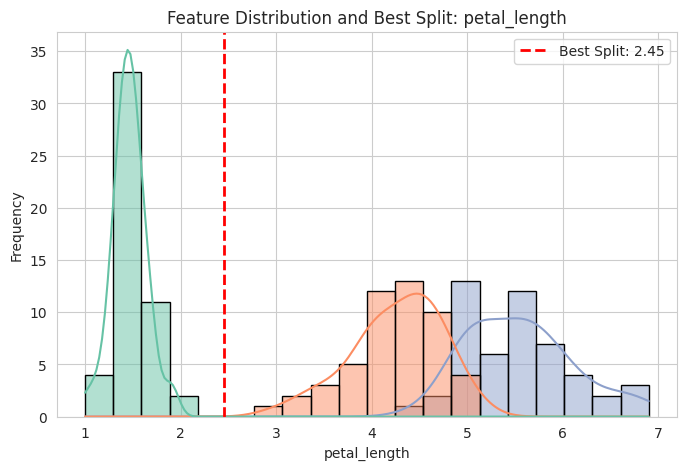

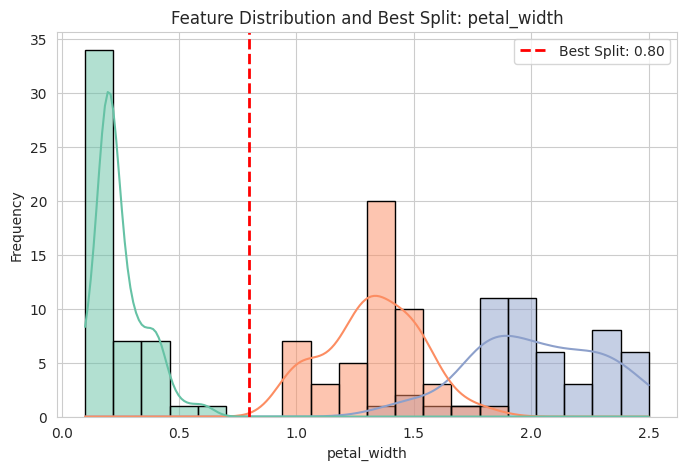

In [90]:
# Plot histograms for the best split features
plot_split_histogram(df["petal_length"], 2.45, y, "petal_length")
plot_split_histogram(df["petal_width"], 0.80, y, "petal_width")

##📌 Step 2: Implementing Entropy Calculation (By Hand)
Now, we will:

* ✅ Define Entropy → A measure of impurity used in Decision Trees.
* ✅ Implement Entropy Calculation by hand.
* ✅ Compute Entropy for our dataset and compare it to Gini.

### **🔹 What is Entropy?**

Entropy measures the uncertainty (impurity) in a dataset:

$
Entropy = -\sum p_i \log_2(p_i)
$

Where:

- \( p_i \) is the proportion of class \( i \) in the dataset.
- **Low Entropy (~0)** → The dataset is pure (one class dominates).
- **High Entropy (~1 or more)** → The dataset is highly mixed (many


In [111]:
def entropy(y):
  """
  Computes the entropy for a given set of class labels.

  Args:
  y (list or array): The target class labels.

  Returns:
  float: Entropy value.
  """
  try:
    # Count occurences for each class
    _, counts = np.unique(y, return_counts = True)

    # Calculate the probabilities
    probabilities = counts/counts.sum()

    # Compute entropy (avoid log(0)) using np.where
    entropy_values = -np.sum(probabilities * np.log2(probabilities, where = (probabilities > 0)))

    # print("✅ Entopy has been calculated successfuly!")
    return entropy_values

  except Exception as e:
    print(f"❌ Error while calculating Entropy: {e }")

In [104]:

print("\nEntropy:", round(entropy(y), 4))

✅ Entopy has been calculated successfuly!

Entropy: 1.585


* ✔ Entropy = 1.585 → This is high, meaning the dataset is highly mixed.
* ✔ This makes sense because the Iris dataset has 3 classes (0, 1, 2) with equal distribution → Maximum uncertainty.
* ✔ High entropy means a split is needed to create purer subsets.

In [112]:
def entropy_split(feature, target):
    """
    Computes the best Entropy split for a continuous feature.

    Args:
    feature (array): The continuous feature values.
    target (array): The target class labels.

    Returns:
    tuple: Best threshold and corresponding Entropy value.
    """
    try:
        sorted_indices = np.argsort(feature)  # Sort feature values
        sorted_feature = feature[sorted_indices]
        sorted_target = target[sorted_indices]

        best_entropy = float("inf")  # Start with a very high entropy value
        best_threshold = None

        # Try splitting at every midpoint between consecutive values
        for i in range(1, len(feature)):
            threshold = (sorted_feature[i - 1] + sorted_feature[i]) / 2  # Midpoint as threshold

            # Create left and right splits
            left_target = sorted_target[:i]
            right_target = sorted_target[i:]

            # Compute weighted entropy for the split
            left_entropy = entropy(left_target)
            right_entropy = entropy(right_target)

            weight_left = len(left_target) / len(feature)
            weight_right = len(right_target) / len(feature)

            entropy_split_value = (weight_left * left_entropy) + (weight_right * right_entropy)

            # Update best split if entropy is lower
            if entropy_split_value < best_entropy:
                best_entropy = entropy_split_value
                best_threshold = threshold

        return round(best_threshold, 2), round(best_entropy, 4)

    except Exception as e:
        print(f"❌ Error in entropy_split: {e}")
        return None, None




In [113]:
# Compute Entropy for all features
try:
    entropy_indexes = []
    overall_best_entropy = float("inf")  # Start with a very high entropy
    for col in df.drop(columns=['target']).columns:
        best_threshold, best_entropy = entropy_split(df[col].values, y.values)

        if best_threshold is not None:
            print(f"♻ Best split for {col}: Threshold = {best_threshold:.2f}, Entropy = {best_entropy:.4f}")
            print("_" * 55)
            entropy_indexes.append((best_entropy, best_threshold, col))

            if best_entropy < overall_best_entropy:
                overall_best_entropy = best_entropy

    print("_" * 55)
    print(entropy_indexes, overall_best_entropy)

except Exception as e:
    print(f"❌ Error in processing entropy for features: {e}")

♻ Best split for sepal_length: Threshold = 5.50, Entropy = 0.9879
_______________________________________________________
♻ Best split for sepal_width: Threshold = 3.00, Entropy = 1.2008
_______________________________________________________
♻ Best split for petal_length: Threshold = 2.45, Entropy = 0.6667
_______________________________________________________
♻ Best split for petal_width: Threshold = 0.80, Entropy = 0.6667
_______________________________________________________
_______________________________________________________
[(0.9879, 5.5, 'sepal_length'), (1.2008, 3.0, 'sepal_width'), (0.6667, 2.45, 'petal_length'), (0.6667, 0.8, 'petal_width')] 0.6667


**🔍 Key Observations:**
* ✔ Lowest Entropy = 0.6667 for Petal Length & Petal Width → These are the best features for splitting.
* ✔ Sepal Width has the highest Entropy (1.2008) → It is the worst feature for splitting.
* ✔ Same conclusion as Gini! Both Gini and Entropy picked Petal Length (2.45) & Petal Width (0.80) as the best splits.

# Practical Model Application

## 🔹 Step 1: Train a Decision Tree Using Gini

In [116]:
# traina decision tree with gini
tree_gini = DecisionTreeClassifier(criterion="gini", random_state = 42)
tree_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [124]:
# Make prediciton
y_train_pred_1 = tree_gini.predict(X_train)
y_test_pred_1 = tree_gini.predict(X_test)

In [125]:
# Evaluate accuracy
train_acc_gini = accuracy_score(y_train, y_train_pred_1)
test_acc_gini = accuracy_score(y_test, y_test_pred_1)

print(f"✅ Decision Tree (Gini) - Train Accuracy: {train_acc_gini:.4f}")
print(f"✅ Decision Tree (Gini) - Test Accuracy: {test_acc_gini:.4f}")

✅ Decision Tree (Gini) - Train Accuracy: 1.0000
✅ Decision Tree (Gini) - Test Accuracy: 0.9333


## 🔹 Step 2: Train a Decision Tree Using Entropy

In [120]:
# Train a Decision Tree with Entropy
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=42)
tree_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [121]:
# Make prediction on train and test splits
y_train_pred_2 = tree_entropy.predict(X_train)
y_test_pred_2 = tree_entropy.predict(X_test)


In [123]:
  # Evaluate accuracy
train_acc_entropy = accuracy_score(y_train, y_train_pred_2)
test_acc_entropy = accuracy_score(y_test, y_test_pred_2)

print(f"✅ Decision Tree (Entropy) - Train Accuracy: {train_acc_entropy:.4f}")
print(f"✅ Decision Tree (Entropy) - Test Accuracy: {test_acc_entropy:.4f}")

✅ Decision Tree (Entropy) - Train Accuracy: 1.0000
✅ Decision Tree (Entropy) - Test Accuracy: 0.9333


**🔍 Key Observations**
* ✅ Both Gini & Entropy performed identically → This confirms they usually make the same splits.
* ✅ 100% accuracy on training data → Possible overfitting (the model memorized training data).
* ✅ 93.33% test accuracy → Good generalization, but a small drop indicates some overfitting.

**📌 What Does This Mean?**
- ✔ Our model is slightly too complex → It fully memorized the training data.
- ✔ We need to tune the model using Bias-Variance Tradeoff techniques.

# Bias-Variance Tradeoff Experiment (With Plot)


Now, we will:
* ✅ Train multiple Decision Tree models with different depths.
* ✅ Measure Train & Test Accuracy to observe the Bias-Variance Tradeoff.
* ✅ Visualize the tradeoff in a plot to see where overfitting/underfitting occurs.

In [126]:
def bias_variance_tradeoff(X_train, X_test, y_train, y_test, max_depth_range=15):
    """
    Trains multiple Decision Tree models with different depths and plots the bias-variance tradeoff.

    Args:
    X_train, X_test, y_train, y_test: Training and testing data.
    max_depth_range (int): Maximum depth to test.

    Returns:
    None
    """
    depths = list(range(1, max_depth_range + 1))  # Depths to test
    train_accuracies = []
    test_accuracies = []

    # Train models with different depths
    for depth in depths:
        model = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate accuracy
        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(depths, train_accuracies, label="Train Accuracy", marker="o", linestyle="--", color="blue")
    plt.plot(depths, test_accuracies, label="Test Accuracy", marker="s", linestyle="-", color="red")

    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy")
    plt.title("Bias-Variance Tradeoff in Decision Trees")
    plt.legend()
    plt.grid(True)
    plt.show()




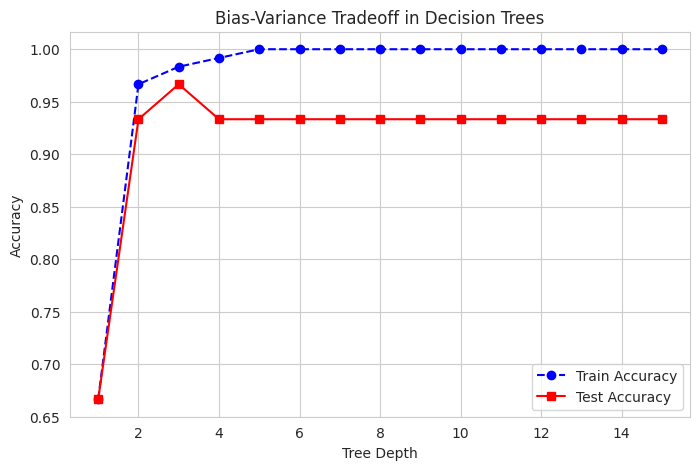

In [127]:
# Run the function to analyze Bias-Variance Tradeoff
bias_variance_tradeoff(X_train, X_test, y_train, y_test)

**📌 What Depth Should We Choose?**
* ✅ Depth = 3 → Best balance between bias and variance.
* ✅ Going deeper doesn’t improve Test Accuracy, so limiting depth prevents overfitting.

# Final model

In [128]:
# Train the Decision Tree with the optimal depth
final_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Final Decision Tree (Depth=3) - Train Accuracy: {train_acc:.4f}")
print(f"✅ Final Decision Tree (Depth=3) - Test Accuracy: {test_acc:.4f}")


✅ Final Decision Tree (Depth=3) - Train Accuracy: 0.9833
✅ Final Decision Tree (Depth=3) - Test Accuracy: 0.9667


**🔍 Key Observations**
* ✔ Train Accuracy (98.33%) is slightly below 100% → This confirms the model is not overfitting.
* ✔ Test Accuracy (96.67%) improved compared to the previous model (93.33%) → Better generalization.
* ✔ Train & Test Accuracy are very close → Perfect Bias-Variance Tradeoff! 🎯

✅ Final Decision → This is an optimal model! We don’t need further tuning.

# Extracting Human-Readable Rules from the Decision Tree

In [131]:
def print_decision_rules(model, feature_names):
    """
    Prints human-readable decision tree rules with better formatting.

    Args:
    model: Trained DecisionTreeClassifier model.
    feature_names: List of feature names.

    Returns:
    None
    """
    rules = export_text(model, feature_names=feature_names)

    # Improve readability by adding indentation
    formatted_rules = rules.replace("|", "│").replace("---", "→").replace("\n", "\n  ")

    print("✅ Human-Readable Decision Tree Rules:\n")
    print(formatted_rules)

# Print rules with better formatting
print_decision_rules(final_model, list(df.drop(columns=['target']).columns))


✅ Human-Readable Decision Tree Rules:

│→ petal_length <= 2.45
  │   │→ class: 0
  │→ petal_length >  2.45
  │   │→ petal_width <= 1.65
  │   │   │→ petal_length <= 4.95
  │   │   │   │→ class: 1
  │   │   │→ petal_length >  4.95
  │   │   │   │→ class: 2
  │   │→ petal_width >  1.65
  │   │   │→ petal_length <= 4.85
  │   │   │   │→ class: 2
  │   │   │→ petal_length >  4.85
  │   │   │   │→ class: 2
  


# Visualizing the Decision Tree Graphically

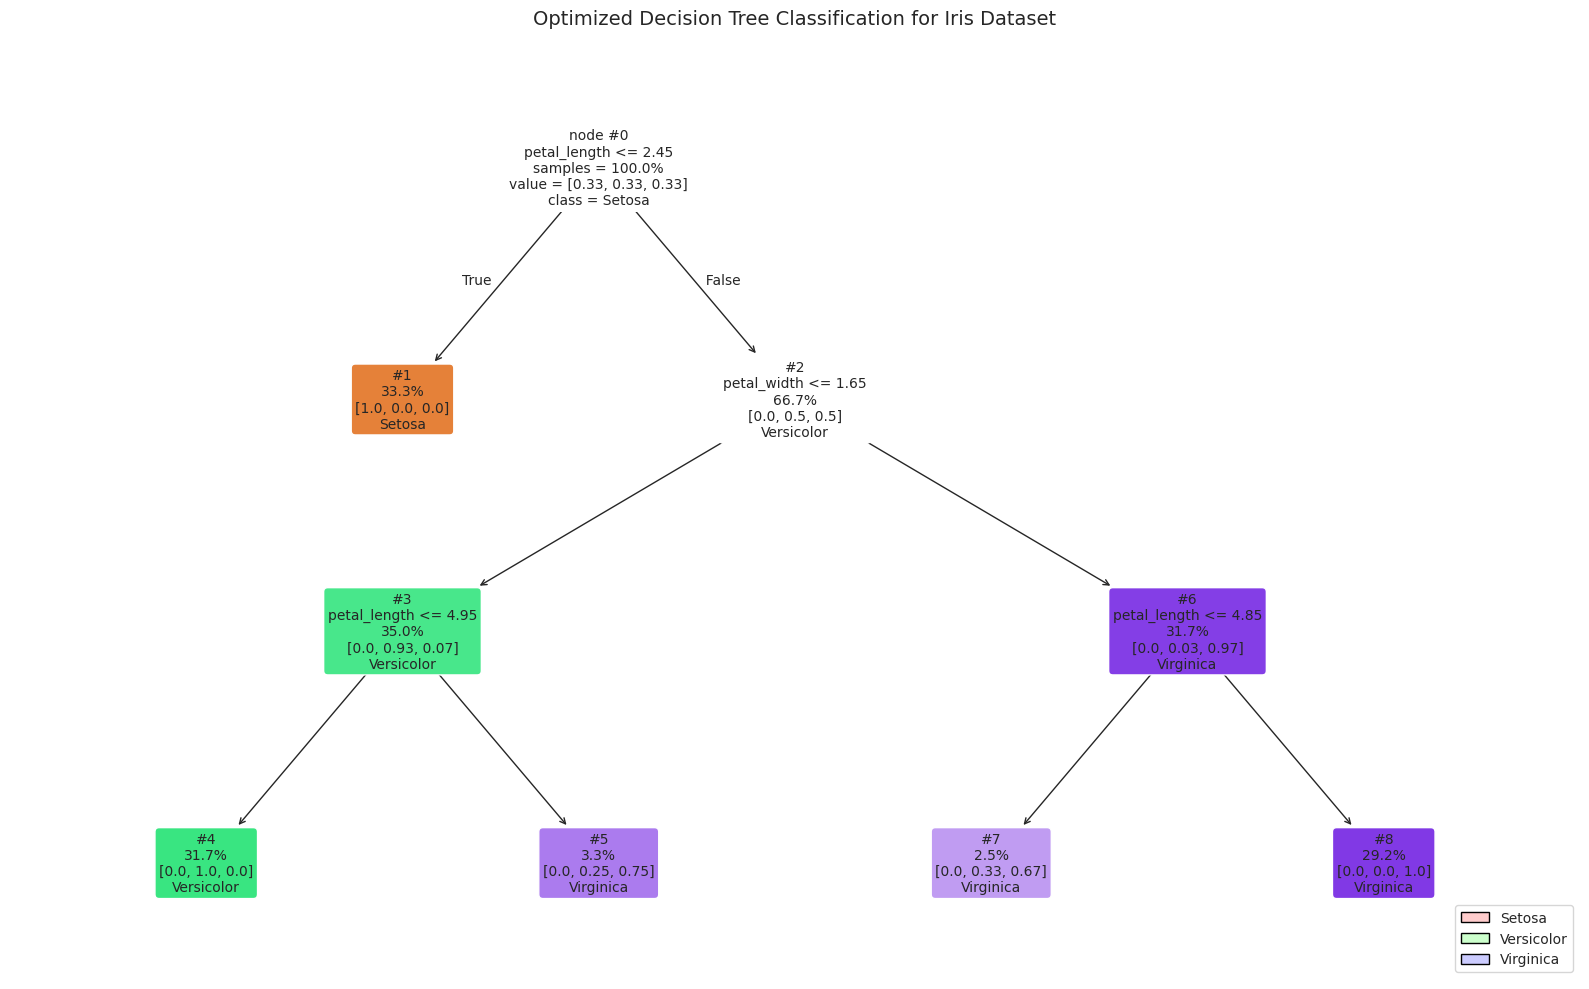

In [135]:
# Set figure size with adjusted aspect ratio
plt.figure(figsize=(16, 10), dpi=100)

# Plot the decision tree with enhanced parameters
tree_plot = plot_tree(final_model,
                     feature_names=list(df.drop(columns=['target']).columns),
                     class_names=["Setosa", "Versicolor", "Virginica"],
                     filled=True,
                     rounded=True,
                     fontsize=10,  # Increased font size for better readability
                     node_ids=True,  # Show node IDs for potential reference
                     proportion=True,  # Show proportions in classes
                     precision=2,  # Round values to 2 decimal places
                     impurity=False,  # Remove impurity to reduce clutter
                     label='root',  # Clear labeling of root node
                     max_depth=3)  # Limit depth if tree is too large (adjust as needed)

# Add annotations and styling
plt.title("Optimized Decision Tree Classification for Iris Dataset", fontsize=14, pad=20)
plt.grid(False)  # Remove background grid
plt.box(False)  # Remove bounding box


# Add custom legend (optional)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#ffcccc', edgecolor='black', label='Setosa'),
                   Patch(facecolor='#ccffcc', edgecolor='black', label='Versicolor'),
                   Patch(facecolor='#ccccff', edgecolor='black', label='Virginica')]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Improve layout and save high-resolution version
plt.tight_layout()
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

**📌 What This Means:**
* ✅ Model is simple & interpretable → Humans can easily follow the logic.
* ✅ Petal length & petal width are the key features → Sepal features were not used because they are less effective.
* ✅ Tree is balanced & not too deep → This prevents overfitting while maintaining high accuracy.